# Project: Machine Learning

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Make a copy of the Project**: Please make a copy of this project either to your own Google Drive or download locally. Work on the copy of the project. The master project is **Read-Only**, meaning you can edit, but it will not be saved when you close the master project. To avoid total loss of your work, remember to make a copy.

2. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
3. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive. This will be the repository for all your completed project files, aiding you in keeping your work organized and accessible.
   
4. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
5. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
6. **Setting Permission to Public**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Project Description

In this Machine Learning Project, you will create your own supervised Machine Learning (ML) model. We will use the full FIFA21 Dataset and we will identify players that are above average.

We will use the column "Overall" with a treshold of 75 to define players that are 'Valuable'. This will become our target output which we need for a supervised ML model. Because we use the "Overall" as our target output, you cannot use "Overall" in your features, this will be explained further below.

This project will provide a comprehensive overview of your abilities in machine learning, from understanding the problem, choosing the right model, training, and optimizing it.

## Grading Criteria

Your score will be awarded based on the following criteria:
* 100: The model has an accuracy of more than 90% and an F1 score of more than 80%. This model is excellent and demonstrates a strong understanding of the task.
* 90: The model has an accuracy of more than 85% and an F1 score of more than 75%. This model is very good, with some room for improvement.
* 80: The model has an accuracy of more than 80% and an F1 score between 70% and 75%. This model is fairly good but needs improvement in balancing precision and recall.
* 70: The model has an accuracy of more than 70% and an F1 score between 60% and 70%. This model is below average and needs significant improvement.
* 60 or below: The model has an accuracy of less than 70% or an F1 score of less than 60%, or the student did not submit the accuracy and F1 score. This model is poor and needs considerable improvement.

Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Happy modeling!

>Note: If you get the accuracy of 100% and F1 score of 100%, while it may earn you good grades, it's an indication of overfitting.

## Student Identity

In [1]:
# @title #### Student Identity
student_id = "REAZRODN" # @param {type:"string"}
name = "Dwi Liliyawati" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1l0xth3G1Ik9Rf9j4z3Nasqd08zQ3eChD?usp=sharing"  # @param {type:"string"}

assignment_id = "00_ml_project"

# Import grader package
!pip install rggrader
from rggrader import submit, submit_image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Write any package/module installation that you need
# pip install goes here, this helps declutter your output below
!pip install --upgrade scikit-learn


In [39]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import  precision_score, recall_score, f1_score,accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

## Load the dataset and clean it

In this task, you will prepare and load your dataset. You need to download the full FIFA 21 Dataset from the link here: [Kaggle FIFA Player Stats Database](https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?resource=download&select=FIFA21_official_data.csv).

>Note: Make sure you download FIFA 21 dataset.
>
>![FIFA21 Dataset](https://storage.googleapis.com/rg-ai-bootcamp/projects/fifa21_dataset-min.png)

After you download the dataset, you will then import the dataset then you will clean the data. For example there may be some empty cell in the dataset which you need to fill. Maybe there are also data that you need to convert to numeric value for analysis. Identify the data that is incomplete and fix them.

In the code block below, you can use the comments to guide you on what to do.

In [5]:
# Write your preprocessing and data cleaning here

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Mastering AI Bootcamp - Dwi Liliyawati/Project-2-Machine_Learning/FIFA21_official_data.csv')

# cek struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

Berikut adalah penjelasan untuk setiap kolom dalam dataset FIFA21:

### **Kolom Umum**

1. **`ID`**: Identifikasi unik untuk setiap pemain. Biasanya berupa nomor integer yang digunakan untuk membedakan satu pemain dari yang lainnya.

2. **`Name`**: Nama lengkap pemain. Ini adalah informasi identifikasi utama.

3. **`Age`**: Usia pemain dalam tahun. Ini memberikan informasi tentang tahap karier pemain.

4. **`Photo`**: URL atau path ke foto pemain. Digunakan untuk referensi visual.

5. **`Nationality`**: Kewarganegaraan pemain. Negara tempat pemain berasal.

6. **`Flag`**: URL atau path ke gambar bendera negara kewarganegaraan pemain. Ini menyediakan visualisasi bendera negara pemain.

7. **`Overall`**: Rating keseluruhan pemain dalam game FIFA21. Ini menggambarkan kualitas umum pemain.

8. **`Potential`**: Potensi rating maksimum pemain yang bisa dicapai di masa depan. Ini menunjukkan seberapa baik pemain bisa berkembang.

9. **`Club`**: Klub sepak bola tempat pemain saat ini bermain. Memberikan informasi tentang tim yang pemain tergabung.

10. **`Club Logo`**: URL atau path ke logo klub tempat pemain bermain. Digunakan untuk referensi visual klub.

11. **`Value`**: Nilai pasar pemain dalam mata uang. Menunjukkan biaya untuk merekrut pemain.

12. **`Wage`**: Gaji mingguan pemain dalam mata uang. Ini menggambarkan berapa banyak pemain dibayar setiap minggu.

13. **`Special`**: Rating special yang mungkin mencakup fitur unik atau keistimewaan pemain dalam game.

14. **`Preferred Foot`**: Kaki dominan pemain (Kanan atau Kiri). Menunjukkan kaki utama yang digunakan untuk bermain.

15. **`International Reputation`**: Rating reputasi internasional pemain, biasanya dinyatakan dalam skala 1 hingga 5. Menunjukkan popularitas pemain secara global.

16. **`Weak Foot`**: Kemampuan pemain menggunakan kaki yang tidak dominan. Dinilai dari 1 hingga 5, menggambarkan seberapa baik pemain menggunakan kaki yang kurang dominan.

17. **`Skill Moves`**: Rating kemampuan pemain dalam melakukan trik dan gerakan skillful, dinyatakan dalam skala 1 hingga 5.

18. **`Work Rate`**: Frekuensi dan intensitas kerja pemain, biasanya dibagi menjadi `Attacking` (serangan) dan `Defensive` (pertahanan).

19. **`Body Type`**: Tipe tubuh pemain dalam game. Mempengaruhi penampilan dan animasi pemain.

20. **`Real Face`**: Menunjukkan apakah pemain memiliki wajah yang disesuaikan dengan wajah nyata atau tidak (biasanya `Yes` atau `No`).

21. **`Position`**: Posisi bermain pemain di lapangan (misalnya, Forward, Midfielder, Defender, Goalkeeper).

22. **`Jersey Number`**: Nomor punggung pemain di klubnya.

23. **`Joined`**: Tanggal atau tahun saat pemain bergabung dengan klub saat ini.

24. **`Loaned From`**: Klub asal pemain jika pemain sedang dipinjamkan dari klub lain.

25. **`Contract Valid Until`**: Tahun hingga kontrak pemain dengan klub saat ini berlaku.

26. **`Height`**: Tinggi badan pemain dalam sentimeter.

27. **`Weight`**: Berat badan pemain dalam kilogram.

### **Kolom Teknikal dan Statistik**

28. **`Crossing`**: Rating kemampuan pemain dalam melakukan umpan silang, dinyatakan dalam skala 1 hingga 99.

29. **`Finishing`**: Rating kemampuan pemain dalam menyelesaikan peluang, dinyatakan dalam skala 1 hingga 99.

30. **`HeadingAccuracy`**: Rating akurasi sundulan pemain, dinyatakan dalam skala 1 hingga 99.

31. **`ShortPassing`**: Rating kemampuan pemain dalam melakukan operan pendek, dinyatakan dalam skala 1 hingga 99.

32. **`Volleys`**: Rating kemampuan pemain dalam melakukan tendangan voli, dinyatakan dalam skala 1 hingga 99.

33. **`Dribbling`**: Rating kemampuan pemain dalam menggiring bola, dinyatakan dalam skala 1 hingga 99.

34. **`Curve`**: Rating kemampuan pemain dalam melakukan tendangan dengan kurva, dinyatakan dalam skala 1 hingga 99.

35. **`FKAccuracy`**: Rating akurasi tendangan bebas pemain, dinyatakan dalam skala 1 hingga 99.

36. **`LongPassing`**: Rating kemampuan pemain dalam melakukan operan panjang, dinyatakan dalam skala 1 hingga 99.

37. **`BallControl`**: Rating kemampuan pemain dalam mengontrol bola, dinyatakan dalam skala 1 hingga 99.

38. **`Acceleration`**: Rating kemampuan pemain dalam akselerasi dari posisi diam, dinyatakan dalam skala 1 hingga 99.

39. **`SprintSpeed`**: Rating kecepatan maksimum pemain saat berlari cepat, dinyatakan dalam skala 1 hingga 99.

40. **`Agility`**: Rating kelincahan pemain, dinyatakan dalam skala 1 hingga 99.

41. **`Reactions`**: Rating kemampuan reaksi pemain terhadap situasi di lapangan, dinyatakan dalam skala 1 hingga 99.

42. **`Balance`**: Rating keseimbangan pemain, dinyatakan dalam skala 1 hingga 99.

43. **`ShotPower`**: Rating kekuatan tembakan pemain, dinyatakan dalam skala 1 hingga 99.

44. **`Jumping`**: Rating kemampuan melompat pemain, dinyatakan dalam skala 1 hingga 99.

45. **`Stamina`**: Rating stamina pemain, menunjukkan seberapa lama pemain dapat mempertahankan performa tinggi, dinyatakan dalam skala 1 hingga 99.

46. **`Strength`**: Rating kekuatan fisik pemain, dinyatakan dalam skala 1 hingga 99.

47. **`LongShots`**: Rating kemampuan pemain dalam melakukan tembakan jarak jauh, dinyatakan dalam skala 1 hingga 99.

48. **`Aggression`**: Rating agresi pemain dalam permainan, dinyatakan dalam skala 1 hingga 99.

49. **`Interceptions`**: Rating kemampuan pemain dalam memotong operan lawan, dinyatakan dalam skala 1 hingga 99.

50. **`Positioning`**: Rating kemampuan pemain dalam posisi di lapangan, dinyatakan dalam skala 1 hingga 99.

51. **`Vision`**: Rating kemampuan pemain dalam melihat dan mengatur permainan, dinyatakan dalam skala 1 hingga 99.

52. **`Penalties`**: Rating kemampuan pemain dalam mengeksekusi tendangan penalti, dinyatakan dalam skala 1 hingga 99.

53. **`Composure`**: Rating ketenangan pemain dalam situasi tekanan, dinyatakan dalam skala 1 hingga 99.

54. **`Marking`**: Rating kemampuan pemain dalam menandai lawan (terutama dalam bertahan), dinyatakan dalam skala 1 hingga 99.

55. **`StandingTackle`**: Rating kemampuan pemain dalam melakukan tackle saat berdiri, dinyatakan dalam skala 1 hingga 99.

56. **`SlidingTackle`**: Rating kemampuan pemain dalam melakukan tackle dengan sliding, dinyatakan dalam skala 1 hingga 99.

57. **`GKDiving`**: Rating kemampuan penjaga gawang dalam menyelam untuk menyelamatkan bola, dinyatakan dalam skala 1 hingga 99.

58. **`GKHandling`**: Rating kemampuan penjaga gawang dalam menangani bola, dinyatakan dalam skala 1 hingga 99.

59. **`GKKicking`**: Rating kemampuan penjaga gawang dalam melakukan tendangan, dinyatakan dalam skala 1 hingga 99.

60. **`GKPositioning`**: Rating kemampuan penjaga gawang dalam positioning yang tepat selama pertandingan, dinyatakan dalam skala 1 hingga 99.

61. **`GKReflexes`**: Rating kemampuan penjaga gawang dalam mereaksi tembakan dan situasi cepat, dinyatakan dalam skala 1 hingga 99.

### **Kolom Tambahan**

62. **`Best Position`**: Posisi terbaik pemain di lapangan berdasarkan kemampuan dan performa.

63. **`Best Overall Rating`**: Rating keseluruhan terbaik yang dicapai pemain di sepanjang kariernya atau berdasarkan performa terbaiknya.

64. **`Release Clause`**: Klausul pelepasan yang menunjukkan biaya yang diperlukan untuk membeli pemain keluar dari kontraknya, biasanya dalam mata uang.

65. **`DefensiveAwareness`**: Rating kesadaran defensif pemain, menunjukkan kemampuan pemain dalam membaca permainan dan membuat keputusan defensif yang tepat.


Dalam dataset FIFA21 ini terdapat 65 kolom. Dari 65 kolom ini akan digunakan untuk feature pada pembuatan model.
Pada project ini bertujuan agar model dapat mengidentifikasikan pemain yang bervaluable. Oleh karena itu data yang tidak berkaitan dengan penentuan nilai overall maka tidak akan digunakan sebagai fitur sehingga perlu dihapus

In [6]:
data_players = df[['ID','Name','Club','Overall']]

In [7]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [8]:
# Penghapusan kolom yang tidak digunakan dalam fitur
df = df.drop(df.columns[[1,2,3,4,5,8,9,10,11,13,14,17,18,19,20,21,22,23,24,25,26,61,62,63]], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  17108 non-null  int64  
 1   Overall             17108 non-null  int64  
 2   Potential           17108 non-null  int64  
 3   Special             17108 non-null  int64  
 4   Weak Foot           17108 non-null  float64
 5   Skill Moves         17108 non-null  float64
 6   Crossing            17108 non-null  float64
 7   Finishing           17108 non-null  float64
 8   HeadingAccuracy     17108 non-null  float64
 9   ShortPassing        17108 non-null  float64
 10  Volleys             17069 non-null  float64
 11  Dribbling           17108 non-null  float64
 12  Curve               17069 non-null  float64
 13  FKAccuracy          17108 non-null  float64
 14  LongPassing         17108 non-null  float64
 15  BallControl         17108 non-null  float64
 16  Acce

In [10]:
df.describe()

,ID,Overall,Potential,Special,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
count,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,...,16821.000000,942.000000,17108.000000,17069.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,16166.000000
mean,221421.276187,66.780161,72.553542,1625.722995,2.981938,2.446107,51.360065,47.719722,53.322072,60.289747,...,59.634088,46.403397,48.101473,45.933271,15.660744,15.529928,15.469839,15.550853,15.771510,47.014475
std,36028.786065,7.019069,5.738347,263.503922,0.674699,0.780278,17.954050,19.456040,17.034499,14.076104,...,11.912131,21.803653,21.532834,21.213315,16.910205,16.212333,15.977547,16.448905,17.209624,20.152543
min,2.000000,38.000000,46.000000,731.000000,1.000000,1.000000,6.000000,3.000000,5.000000,7.000000,...,12.000000,4.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,205451.750000,62.000000,69.000000,1484.000000,3.000000,2.000000,40.000000,32.000000,45.000000,55.000000,...,52.000000,25.250000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,29.000000
50%,230441.000000,67.000000,72.000000,1653.000000,3.000000,2.000000,55.000000,52.000000,56.000000,63.000000,...,60.000000,48.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,52.000000
75%,245402.500000,72.000000,76.000000,1810.000000,3.000000,3.000000,65.000000,63.000000,65.000000,69.000000,...,68.000000,66.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,64.000000
max,259105.000000,93.000000,95.000000,2316.000000,5.000000,5.000000,94.000000,95.000000,93.000000,94.000000,...,96.000000,94.000000,93.000000,95.000000,90.000000,92.000000,93.000000,93.000000,90.000000,94.000000


In [11]:
# Check your data for empty cell
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
print(null_columns)

Volleys                  39
Curve                    39
Agility                  39
Balance                  39
Jumping                  39
Interceptions             3
Positioning               3
Vision                   39
Composure               287
Marking               16166
SlidingTackle            39
DefensiveAwareness      942
dtype: int64


Terdapat 12 kolom dari keseluruhan 41 kolom pilihan pada dataset FIFA21 yang memiliki nilai kosong atau null.

**Pertimbangan Penanganan Missing Value**
- untuk kolom volleys, curve, agility, balance, jumping, vision, slidingtackle memiliki 39 missing value. Karena missing value relatif kecil maka akan diimputasi dengan mean/median.

- untuk interceptions, positioning memiliki 3 missing value maka akan diimputasi dengan mean/median

- composure memiliki 287 missing value maka akan diterapkan metode imputasi dengan median/mean atau knn

- marking memiliki 16166 missing value, maka akan dipertimbangkan menghapus kolom

- defensiveawarenes memiliki 924 missing value, akan dicek distribusi data terlebih dahulu atau dihapus kolomnya

In [12]:
from pickle import TRUE
# handling missing value
df['Volleys'].fillna(df['Volleys'].median(), inplace=True)
df['Curve'].fillna(df['Curve'].median(), inplace=True)
df['Agility'].fillna(df['Agility'].median(), inplace=True)
df['Balance'].fillna(df['Balance'].median(), inplace=True)
df['Jumping'].fillna(df['Jumping'].median(), inplace=True)
df['Vision'].fillna(df['Vision'].median(), inplace=True)
df['SlidingTackle'].fillna(df['SlidingTackle'].median(), inplace=True)
df['Interceptions'].fillna(df['Interceptions'].median(), inplace=True)
df['Positioning'].fillna(df['Positioning'].median(), inplace=True)
df['Composure'].fillna(df['Composure'].median(), inplace=True)
df.drop(columns=['Marking', 'DefensiveAwareness'], inplace=True)

In [13]:
from scipy.stats import shapiro

# Shapiro-Wilk Test
stat, p_value = shapiro(df['Composure'].dropna())
print("Shapiro-Wilk Test Statistic:", stat)
print("P-Value:", p_value)


Shapiro-Wilk Test Statistic: 0.986625326082245
P-Value: 7.1420685985089435e-37


data composure tidak terdistribusi normal maka imputasi akan digunakan median

In [14]:
from scipy.stats import kstest

# Kolmogorov-Smirnov Test
stat, p_value = kstest(df['Composure'].dropna(), 'norm')
print("Kolmogorov-Smirnov Test Statistic:", stat)
print("P-Value:", p_value)


Kolmogorov-Smirnov Test Statistic: 1.0
P-Value: 0.0


In [16]:
df.isnull().sum()

,0
ID,0
Overall,0
Potential,0
Special,0
Weak Foot,0
Skill Moves,0
Crossing,0
Finishing,0
HeadingAccuracy,0
ShortPassing,0


## Build and Train your model

In this task you will analyze the data and select the features that is best at predicting if the Player is a 'Valuable' player or not.

The first step is to **define the target output** that you will use for training. Here's an example of how to create a target output:
- `df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 50 else 0) #Define the OK Player using treshold of 50.`

Next you will **identify the features** that will best predict a 'Valuable' player. You are required to **submit the features you selected** in the Submission section below.

> **Because we use the "Overall" as our target output, the use of "Overall" in your features is not allowed. You will automatically get 0 if you submit "Overall" in your features. The use of "Best Overall Rating" is also not allowed and will automatically get you a score of 0.**

Once you identify the features, you will then **split the data** into Training set and Testing/Validation set.

Depending on the features you selected, **you may need to scale the features**.

Now you will **train your model, choose the algorithm** you are going to use carefully to make sure it gives the best result.

Once you have trained your model, you need to test the model effectiveness. **Make predictions against your Testing/Validation set** and evaluate your model. You are required to **submit the Accuracy Score and F1 score** in the Submission section below.

In the code block below, you can use the comments to guide you on what to do.

We have also provided 3 variables that you must use in your code, `ml_features`, `ml_accuracy` and `ml_f1_score`. You can move the variables around your code, assign values to them, but you cannot delete them.

In [17]:
# Write your code here

# Define the target output (Good >= 75)
# menambahkan kolom valuable dengan threshold 75
df['Valuable'] = df['Overall'].apply(lambda x:1 if x >= 75 else 0 )
df.head()

,ID,Overall,Potential,Special,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Valuable
0,176580,87,87,2316,4.0,3.0,80.0,92.0,84.0,83.0,...,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,1
1,192985,91,91,2304,5.0,4.0,94.0,82.0,55.0,94.0,...,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,1
2,212198,87,90,2303,4.0,4.0,87.0,77.0,58.0,88.0,...,91.0,86.0,67.0,55.0,12.0,14.0,15.0,8.0,14.0,1
3,194765,87,87,2288,3.0,4.0,83.0,88.0,83.0,84.0,...,86.0,89.0,54.0,49.0,14.0,8.0,14.0,13.0,14.0,1
4,224334,83,83,2280,3.0,4.0,87.0,66.0,57.0,81.0,...,76.0,87.0,82.0,79.0,8.0,14.0,13.0,13.0,14.0,1


In [20]:
df['Valuable'].value_counts()

,count
Valuable,
0,14756
1,2352


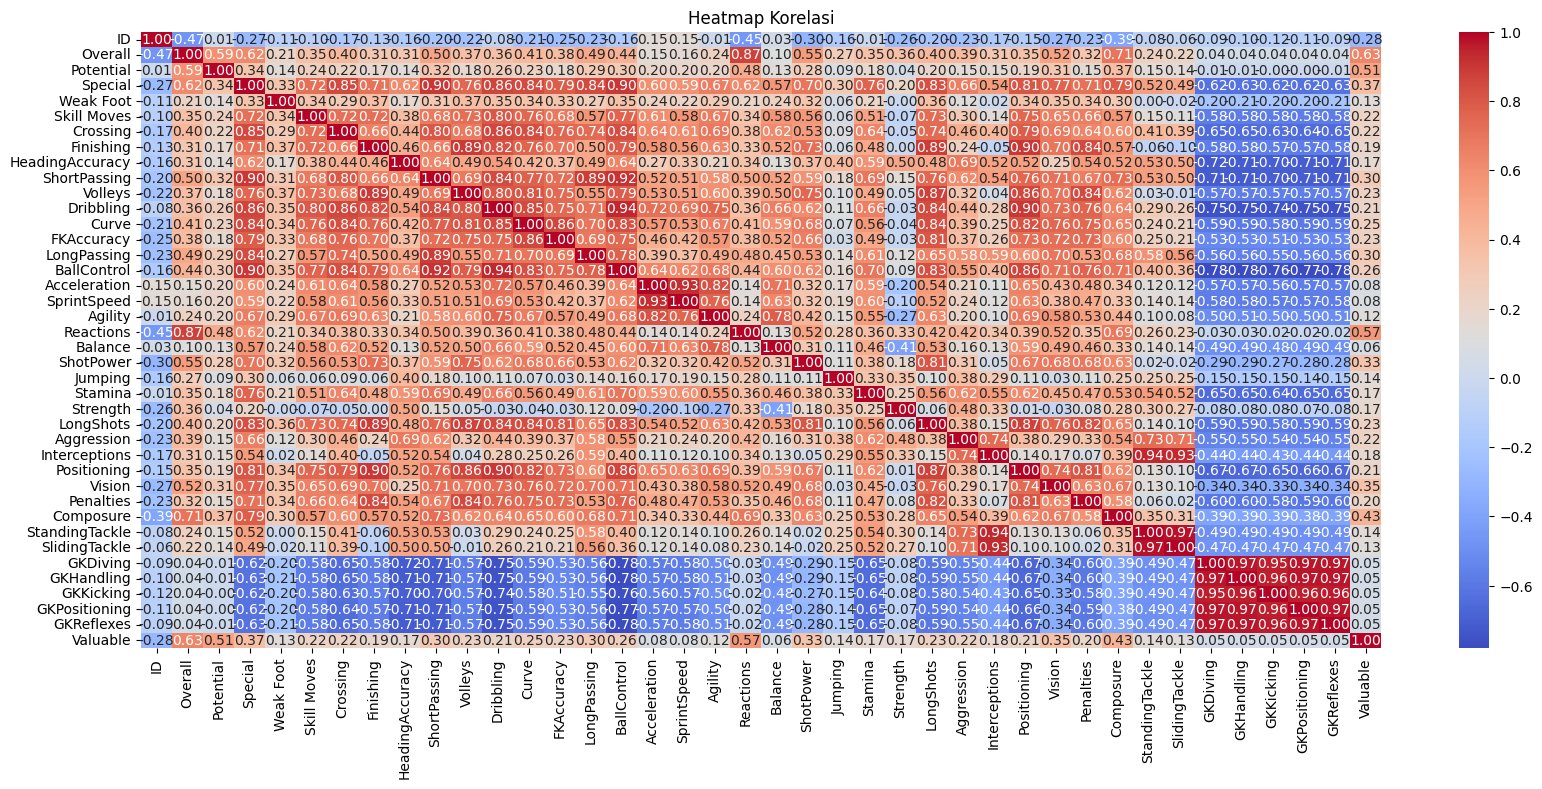

In [19]:
# Menghitung korelasi
correlation = df.corr()

# Membuat heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()


In [22]:
# Mengambil korelasi terhadap kolom 'Valuable'
valuable_correlation = correlation['Valuable'].sort_values(ascending=False)
print(valuable_correlation)


Valuable           1.000000
Overall            0.633722
Reactions          0.565583
Potential          0.506677
Composure          0.430260
Special            0.368280
Vision             0.346692
ShotPower          0.333779
ShortPassing       0.303072
LongPassing        0.297575
BallControl        0.256766
Curve              0.250870
Volleys            0.234531
LongShots          0.232510
FKAccuracy         0.228269
Crossing           0.224427
Skill Moves        0.223372
Aggression         0.218192
Dribbling          0.211345
Positioning        0.208498
Penalties          0.202182
Finishing          0.190263
Interceptions      0.181906
HeadingAccuracy    0.172301
Stamina            0.170921
Strength           0.168068
Jumping            0.144445
StandingTackle     0.142194
Weak Foot          0.133717
SlidingTackle      0.126616
Agility            0.121600
SprintSpeed        0.083704
Acceleration       0.077792
Balance            0.063443
GKKicking          0.050433
GKPositioning      0

### Random Forest

**Train Test Split Using SMOTE**

In [173]:
# Identify the features you will use in your model
ml_features = ['Reactions','Potential','Composure','Special','Vision','ShotPower','ShortPassing','LongPassing', 'BallControl','Curve']

X = df[ml_features]
y = df['Valuable']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (if needed, optional)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# resampling data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


# Train the model
rf_model_1 = RandomForestClassifier(class_weight= 'balanced', random_state=42)
rf_model_1.fit(X_resampled, y_resampled)

# Make predictions using the test set
y_pred = rf_model_1.predict(X_test_scaled)

# Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)



In [174]:
print('Classification Report Testing Model 1 (Random Forest):')
print(classification_report(y_test, y_pred, target_names=['Not Valuable', 'Valuable']))


Classification Report Testing Model 1 (Random Forest):
              precision    recall  f1-score   support

Not Valuable       0.98      0.98      0.98      2966
    Valuable       0.85      0.90      0.87       456

    accuracy                           0.97      3422
   macro avg       0.92      0.94      0.93      3422
weighted avg       0.97      0.97      0.97      3422



**train test split using smote and hyperparamter tuning (FIX)**

In [209]:
# Identify the features you will use in your model
ml_features = ['Reactions','Potential','Composure','Special','Vision','ShotPower','ShortPassing','LongPassing', 'BallControl','Curve']

X = df[ml_features]
y = df['Valuable']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (if needed, optional)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# resampling data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# # search best parameter
# search_spaces = {
#     'n_estimators': (50,100,200,500),
#     'max_depth': (5,10,50),
#     'min_samples_split': (2,10),
#     'class_weight': ['balanced', None]
# }

# Train the model
# model = RandomForestClassifier(class_weight= 'balanced', random_state=42)
rf_model_2 = RandomForestClassifier(n_estimators=200,
                               min_samples_split=2,
                               max_depth=50,
                               class_weight = None,
                               random_state=42)
rf_model_2.fit(X_resampled, y_resampled)

# Make predictions using the test set
y_pred = rf_model_2.predict(X_test_scaled)

# Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)



In [210]:
ml_accuracy

0.9669783752191701

In [211]:
ml_f1_score

0.8799149840595112

In [212]:
print('Classification Report Testing Model 2 (Random Forest):')
print(classification_report(y_test, y_pred, target_names=['Not Valuable', 'Valuable']))


Classification Report Testing Model 2 (Random Forest):
              precision    recall  f1-score   support

Not Valuable       0.99      0.98      0.98      2966
    Valuable       0.85      0.91      0.88       456

    accuracy                           0.97      3422
   macro avg       0.92      0.94      0.93      3422
weighted avg       0.97      0.97      0.97      3422



In [213]:
# # Tampilkan hasil terbaik
# print(f"Best parameters: {bayes_search.best_params_}")
# print(f"Best score: {bayes_search.best_score_}")

**model with more feature**

In [188]:
# Identify the features you will use in your model
ml_features = ['Reactions','Potential','Composure','Special','Vision','ShotPower','ShortPassing','LongPassing', 'BallControl','Curve',
               'Volleys','LongShots','FKAccuracy','Crossing','Skill Moves']

X = df[ml_features]
y = df['Valuable']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (if needed, optional)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# resampling data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# search best parameter
# search_spaces = {
#     'n_estimators': (50,100,200,500),
#     'max_depth': (5,10,50),
#     'min_samples_split': (2,10),
#     'class_weight': ['balanced', None]
# }

# Train the model
rf_model_3 = RandomForestClassifier(n_estimators=200,
                               min_samples_split=2,
                               max_depth=50,
                               random_state=42)
rf_model_3.fit(X_resampled, y_resampled)

# Make predictions using the test set
y_pred = rf_model_3.predict(X_test_scaled)

# Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)



In [189]:
y_train_pred = rf_model_3.predict(X_resampled)
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_resampled, y_train_pred, target_names=['Not Valuable', 'Valuable']))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

Not Valuable       1.00      1.00      1.00     11790
    Valuable       1.00      1.00      1.00     11790

    accuracy                           1.00     23580
   macro avg       1.00      1.00      1.00     23580
weighted avg       1.00      1.00      1.00     23580



In [190]:
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_pred, target_names=['Not Valuable', 'Valuable']))


Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

Not Valuable       0.99      0.98      0.98      2966
    Valuable       0.86      0.92      0.89       456

    accuracy                           0.97      3422
   macro avg       0.92      0.95      0.93      3422
weighted avg       0.97      0.97      0.97      3422



Best parameters: OrderedDict([('class_weight', None), ('max_depth', 50), ('min_samples_split', 2), ('n_estimators', 200)])
Best score: 0.9834459346124571

In [164]:
ml_accuracy

0.9669783752191701

In [165]:
ml_f1_score

0.8799149840595112

In [166]:
# y_train_pred = model.predict(X_resampled)
# print('Classification Report Training Model (Random Forest):')
# print(classification_report(y_resampled, y_train_pred, target_names=['Not Valuable', 'Valuable']))

Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

Not Valuable       1.00      1.00      1.00     11790
    Valuable       1.00      1.00      1.00     11790

    accuracy                           1.00     23580
   macro avg       1.00      1.00      1.00     23580
weighted avg       1.00      1.00      1.00     23580



In [191]:
importances = rf_model_3.feature_importances_
feature_names = X.columns

# Mengurutkan fitur berdasarkan pentingnya
indices = importances.argsort()[::-1]

print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. feature {feature_names[indices[i]]} ({importances[indices[i]]})")


Feature ranking:
1. feature Reactions (0.31236479815573376)
2. feature Potential (0.22322762067129784)
3. feature BallControl (0.08807516446281413)
4. feature ShortPassing (0.08014939262266806)
5. feature Composure (0.07225486373293653)
6. feature Special (0.054869483363435105)
7. feature Vision (0.033381511156865246)
8. feature ShotPower (0.02867643205311624)
9. feature Crossing (0.021562949788836834)
10. feature LongPassing (0.01913477575246896)
11. feature LongShots (0.018373023560743273)
12. feature FKAccuracy (0.01321770667117166)
13. feature Skill Moves (0.01181705828219428)
14. feature Volleys (0.011809578813495902)
15. feature Curve (0.011085640912222208)


In [133]:
# from sklearn.model_selection import cross_val_score
# from imblearn.pipeline import Pipeline

# # Membuat pipeline dengan SMOTE dan model
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('smote', SMOTE(random_state=42)),
#     # ('model', RandomForestClassifier(random_state=42))
# ])

# # Cross-validation
# scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
# print(f"Average F1 Score from Cross-Validation: {scores.mean()}")


Average F1 Score from Cross-Validation: 0.5381394627488892


### Logistic Regression

In [204]:
# Identify the features you will use in your model
ml_features = ['Reactions','Potential','Composure','Special','Vision','ShotPower','ShortPassing','LongPassing', 'BallControl','Curve']

X = df[ml_features]
y = df['Valuable']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (if needed, optional)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# resampling data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


# Train the model
lg_model = LogisticRegression()
lg_model.fit(X_resampled, y_resampled)

# Make predictions using the test set
y_pred = lg_model.predict(X_test_scaled)

# Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)



In [205]:
y_train_pred = lg_model.predict(X_resampled)
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_resampled, y_train_pred, target_names=['Not Valuable', 'Valuable']))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

Not Valuable       0.95      0.92      0.93     11790
    Valuable       0.92      0.96      0.94     11790

    accuracy                           0.94     23580
   macro avg       0.94      0.94      0.94     23580
weighted avg       0.94      0.94      0.94     23580



In [206]:
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_pred, target_names=['Not Valuable', 'Valuable']))


Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

Not Valuable       0.99      0.92      0.95      2966
    Valuable       0.63      0.92      0.75       456

    accuracy                           0.92      3422
   macro avg       0.81      0.92      0.85      3422
weighted avg       0.94      0.92      0.92      3422



In [180]:
ml_accuracy

0.9164231443600234

In [181]:
ml_f1_score

0.7460035523978685

### XGBoost

In [196]:
# Identify the features you will use in your model
ml_features = ['Reactions','Potential','Composure','Special','Vision','ShotPower','ShortPassing','LongPassing', 'BallControl','Curve']

X = df[ml_features]
y = df['Valuable']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (if needed, optional)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# resampling data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


# Train the model
xg_model = XGBClassifier()
xg_model.fit(X_resampled, y_resampled)

# Make predictions using the test set
y_pred = xg_model.predict(X_test_scaled)

# Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)



In [197]:
ml_accuracy

0.9701928696668615

In [198]:
y_train_pred = xg_model.predict(X_resampled)
print('Classification Report Training Model (XGBoost):')
print(classification_report(y_resampled, y_train_pred, target_names=['Not Valuable', 'Valuable']))

Classification Report Training Model (XGBoost):
              precision    recall  f1-score   support

Not Valuable       1.00      1.00      1.00     11790
    Valuable       1.00      1.00      1.00     11790

    accuracy                           1.00     23580
   macro avg       1.00      1.00      1.00     23580
weighted avg       1.00      1.00      1.00     23580



In [200]:
print('Classification Report Testing Model (XGBoost):')
print(classification_report(y_test, y_pred, target_names=['Not Valuable', 'Valuable']))


Classification Report Testing Model (XGBoost):
              precision    recall  f1-score   support

Not Valuable       0.98      0.98      0.98      2966
    Valuable       0.89      0.88      0.89       456

    accuracy                           0.97      3422
   macro avg       0.94      0.93      0.94      3422
weighted avg       0.97      0.97      0.97      3422



## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


In [214]:
# Identify the features you will use in your model
ml_features = ['Reactions','Potential','Composure','Special','Vision','ShotPower','ShortPassing','LongPassing', 'BallControl','Curve']

X = df[ml_features]
y = df['Valuable']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (if needed, optional)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# resampling data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the model
# model = RandomForestClassifier(class_weight= 'balanced', random_state=42)
rf_model_2 = RandomForestClassifier(n_estimators=200,
                               min_samples_split=2,
                               max_depth=50,
                               class_weight = None,
                               random_state=42)
rf_model_2.fit(X_resampled, y_resampled)

# Make predictions using the test set
y_pred = rf_model_2.predict(X_test_scaled)

# Evaluate the model
ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)



In [219]:
ml_accuracy

0.9669783752191701

In [216]:
ml_f1_score

0.8799149840595112

In [217]:
# Submit Method

# Do not change the code below
question_id = "01_ml_project_features"
submit(student_id, name, assignment_id, str(ml_features), question_id, drive_link)
question_id = "02_ml_project_accuracy"
submit(student_id, name, assignment_id, str(ml_accuracy), question_id, drive_link)
question_id = "03_ml_project_f1score"
submit(student_id, name, assignment_id, str(ml_f1_score), question_id, drive_link)

'Assignment successfully submitted'

## FIN